# Linear Regression

In this notebook, I will attempt to code various Linear Regression algorithms using numpy.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set_theme()

In [12]:
def mean_squared_error(theta: np.ndarray, X: np.ndarray, y: np.ndarray) -> float:
    """
    theta - hypothesis vector
    X - input matrix, m x n for m samples with n features
    y - target vector
    """
    return np.mean((X.dot(theta) - y)**2)

# test
m, n = 10, 3 # we will create a system with m samples and n features
X = np.random.rand(m*n).reshape(m, n)
theta1 = np.repeat(0.5, n).reshape(n, 1)
y = np.ones(m).reshape(m, 1)
mean_squared_error(theta1, X, y)

0.08473152494361487

In [13]:
# the normal equation
def normal_equation(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    return np.linalg.inv(X.T @ X) @ (X.T @ y)

theta2 = normal_equation(X, y)
mean_squared_error(theta2, X, y)

0.07145736224082436

[[4.07098657]
 [2.99165369]]


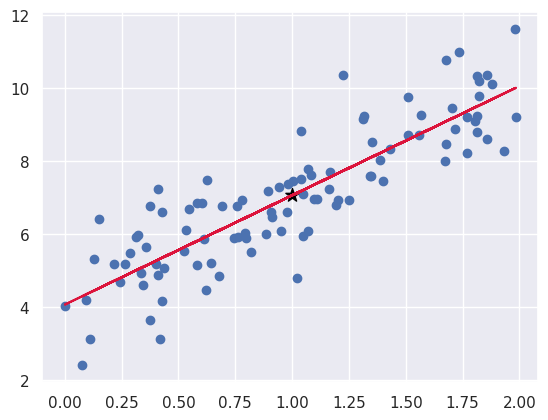

In [14]:
import numpy as np
X = 2 * np.random.rand(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
y = 4 + 3 * X + np.random.randn(100, 1)

theta_best = normal_equation(X_b, y)
print(theta_best)

# a new sample
X_new = np.array([[1]])
X_new_b = np.c_[np.ones((1, 1)), X_new]
new_pred = X_new_b @ theta_best


plt.plot(X, X_b @ theta_best, color='crimson')
plt.scatter(X, y)
plt.scatter(X_new, new_pred, color="black", marker="*", s=100)
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.07098657]), array([[2.99165369]]))

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.07098657],
       [2.99165369]])

In [17]:
# evaluating the complexity of the normal equation
from time import perf_counter

m = 100
perfs = [] # maps n -> time_elapsed

for n in [1000, 2000, 4000, 8000, 16000]:
    start_time = perf_counter()
    X = np.random.rand(m*n).reshape(m, n)
    X_b = np.c_[
        np.ones((m, 1)),
        X
    ]
    theta_y = np.random.rand(n+1)
    y = X_b @ theta_y

    # try to guest theta_y
    theta_best = normal_equation(X_b, y) 
    mae = mean_squared_error(theta_best, X_b, y)
    
    elapsed_time = perf_counter() - start_time
    
    perfs.append(elapsed_time)
# O(n^2) here, so double the features, x4 time
np.array(perfs)[1:] / np.array([0] + perfs[:-1])[1:]

array([2.89611139, 4.57415215, 4.56967617, 5.0657009 ])

## Gradient Descent

"partial derivative" - how much the cost function will change if I change $\theta_j$ just a little bit.

$\frac{\delta}{\delta\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)}-y^{(i)})x^{(i)}_j$

In [18]:
def get_partial_derivatives(
    theta: np.ndarray,
    j: int,
    X_b: np.ndarray,
    y: np.ndarray,
    step=.01,
    iter=10
    ):
    cost = []
    theta_new = theta.copy()
    for i in range(iter):
        cost.append(mean_squared_error(theta_new, X_b, y))
        theta_new[j] += step
    return cost

Instances: 100
Features: 3
j (3) step (-0.1) iterations (20)


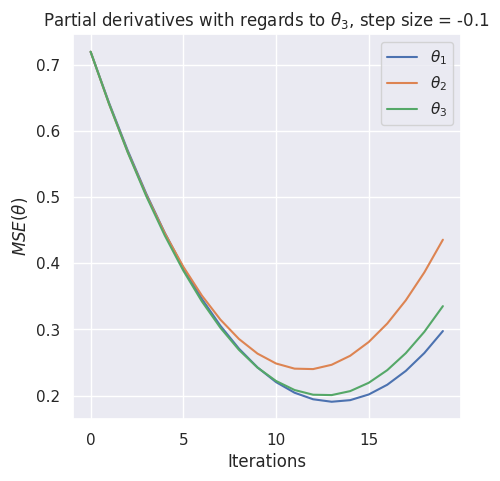

In [33]:
# to demonstrate, consider this system
m,n = 100, 3

np.random.seed(42)
X = np.random.rand(m*n).reshape(m, n)
X_b = np.c_[
    np.ones((m, 1)),
    X
]
y = np.random.rand(m).reshape(m, 1)
# a random theta
theta = np.random.rand(n+1).reshape(n+1, 1)

step = -.1
iter = 20

costs = {}
for j in range(1, n+1):
    costs[j] = get_partial_derivatives(
        theta, j, X_b, y, step=step, iter=iter
    )

print("Instances:", m)
print("Features:", n)
print(f"j ({j}) step ({step}) iterations ({iter})")


plt.figure(figsize=(5, 5))
plt.plot()
for j in range(1, n+1):
    plt.plot(range(iter), costs[j], label=f"$\\theta_{j}$")
plt.xlabel("Iterations")
plt.ylabel("$MSE(\\theta)$")
plt.title(f"Partial derivatives with regards to $\\theta_{j}$, step size = {step}")
plt.legend()
plt.show()

## Batch Gradient Descent

$\triangledown_\theta MSE(\theta)=\frac{2}{m}X^T(X\theta-y)$

In [ ]:
def batch_gradient_descent(theta: np.ndarray, )